In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

In [2]:
# Connexion à MongoDB et chargement des données
client = MongoClient("localhost", 27017)
db = client.IF29
collec = db.tweets_normalized
data = pd.DataFrame(list(collec.find()))

In [4]:
features = [
    "verified",
    "friend_nb",
    "listed_nb",
    "follower_nb",
    "favorites_nb",
    "url_bool",
    "len_description",
    "tweet_nb",
    "hash_avg",
    "at_avg",
    "tweet_user_count",
    "diff",
]
X = data[features]

In [5]:
pca = PCA()
pca_res = pca.fit_transform(X)

In [6]:
cah = linkage(pca_res, method="ward")

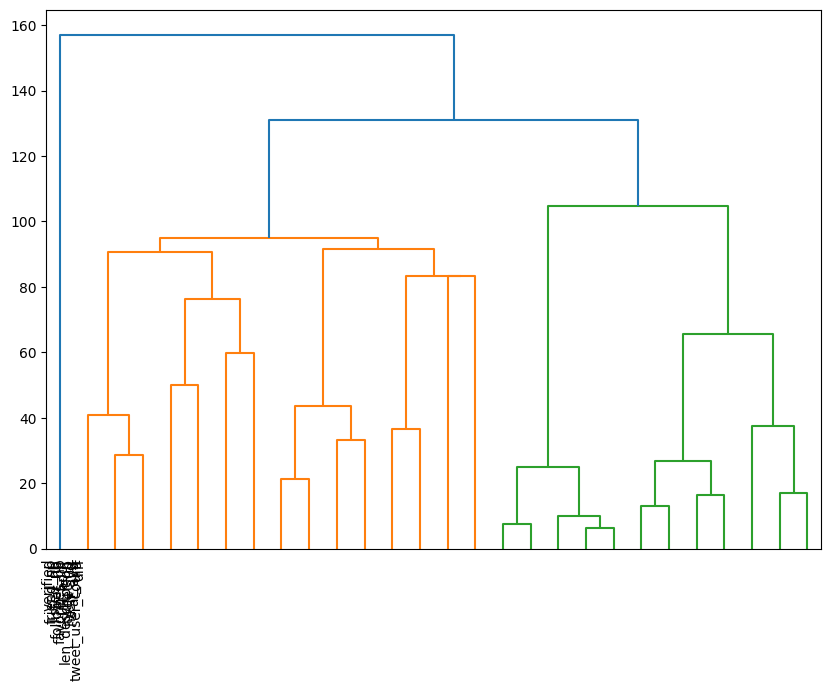

In [8]:
plt.figure(figsize=(10, 7))
dendrogram(cah, truncate_mode="level", p=5)
plt.show()

In [25]:
max_d = 2.0 # ajuster
clusters = fcluster(cah, max_d, criterion="distance")

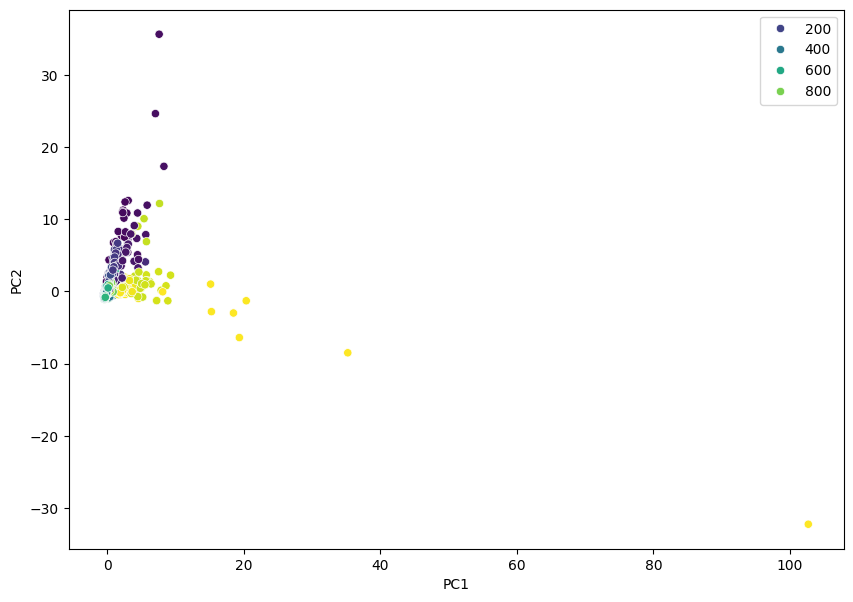

In [26]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_res[:, 0], y=pca_res[:, 1], hue=clusters, palette="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()